## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
micecount = len(combined['Mouse ID'])
micecount

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = combined.loc[combined.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicatemice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
droppedmice = combined[combined["Mouse ID"].isin(duplicatemice)==False]
droppedmice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
droppedmiceclean = len(droppedmice['Mouse ID'])
droppedmiceclean

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summarystatistics = combined.groupby("Drug Regimen").count()

summarystatistics['Mean'] = combined.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summarystatistics['Median'] = combined.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summarystatistics['Variance'] = combined.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summarystatistics['Standard Deviation'] = combined.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summarystatistics['SEM'] = combined.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summarystatistics = summarystatistics[["Mouse ID", "Mean", "Median", "Variance", "Standard Deviation", "SEM"]]

summarystatistics

,Mouse ID,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

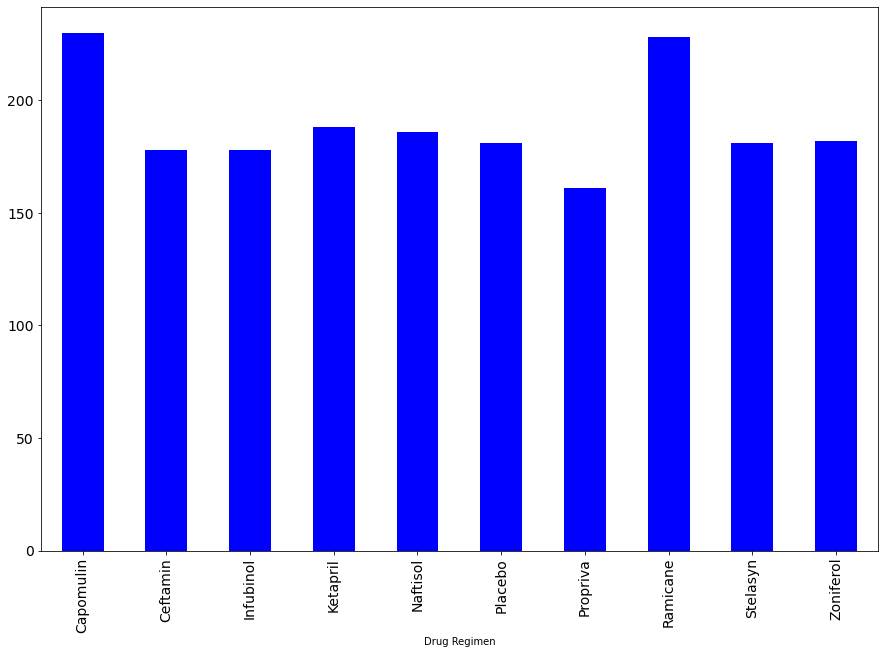

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
barplot = combined.groupby(["Drug Regimen"]).count()["Mouse ID"] 
barplot
pandasplot = barplot.plot.bar(figsize=(15,10), color='b',fontsize = 14)
pandasplot

Text(0, 0.5, 'Number of Mice')

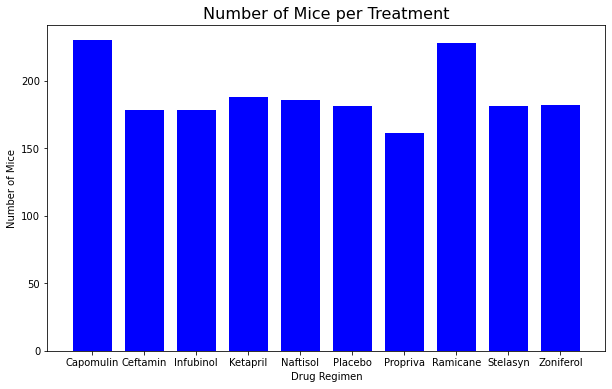

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Define where to write x label and set chart size

pyplotplot= summarystatistics[["Mouse ID"]]
x = np.arange(len(pyplotplot))
tick_locations = [value for value in x]
plt.figure(figsize=(10,6))
plt.bar(x, pyplotplot["Mouse ID"], color="b", width = .75)
plt.xticks(tick_locations, pyplotplot.index.values, rotation="horizontal")

plt.title("Number of Mice per Treatment",fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)

<AxesSubplot:ylabel='Sex'>

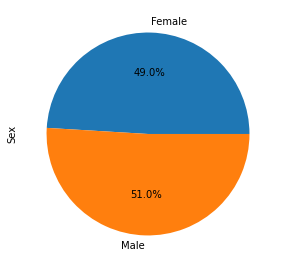

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandasgender = droppedmice.groupby('Sex')
gender = pandasgender["Sex"].count()

plt.figure(figsize=(10,6))
plotpoint = plt.subplot(121, aspect = 'equal')
gender.plot(kind='pie', y = "Quantity", autopct = '%1.1f%%', shadow = False, fontsize = 10)

(-1.13007705244095, 1.102652486142563, -1.1265725257715464, 1.1039875805120591)

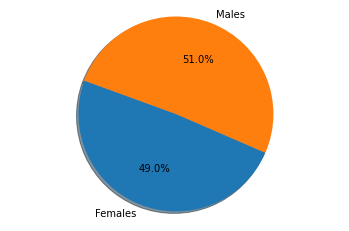

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Females", "Males"]
explode = (0.0, 0)
plt.pie(gender, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
dfCapomulin = combined.loc[combined["Drug Regimen"] == "Capomulin",:]
dfRamicane = combined.loc[combined["Drug Regimen"] == "Ramicane", :]
dfInfubinol = combined.loc[combined["Drug Regimen"] == "Infubinol", :]
dfCeftamin = combined.loc[combined["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
maxCapomulin = dfCapomulin.groupby('Mouse ID').max()['Timepoint']
volCapomulin = pd.DataFrame(maxCapomulin)
CapomulinMerge = pd.merge(volCapomulin, combined, on=("Mouse ID", "Timepoint"))
CapomulinMerge.head()

#maxCeftamin = dfCeftamin.groupby('Mouse ID').max()['Timepoint']
#volCeftamin = pd.DataFrame(dfCeftamin)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#RamicaneMerge = pd.merge(volRamicane, combined, on=("Mouse ID", "Timepoint"))
#CeftaminMerge = pd.merge(volCeftamin, combined, on=("Mouse ID", "Timepoint"))

#INFtumorvol = InfubinolMerge['Tumor Volume (mm3)']
#CEFTtumorvol = CeftaminMerge['Tumor Volume (mm3)']

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [32]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
